<a href="https://colab.research.google.com/github/piyush182004/CODE-ALPHA_DS/blob/main/TASK3PREDICTIVEMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


# **Load and Explore the Dataset**

In [2]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print(data.head())

# Get basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
c

# **Preprocess the Data**

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

# Display the first few rows to check the changes
print(data.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


# **Split the Data**

In [4]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Build and Train the Linear Regression Model**

In [5]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

# **Evaluate the Model**

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 4186.508898366433
Mean Squared Error: 33635210.431178406
Root Mean Squared Error: 5799.587091438356
R-squared: 0.7833463107364539


# **Make Predictions Example**

In [8]:
# Example of making a prediction on new data
new_data = pd.DataFrame({
    'age': [28],
    'sex': [1],
    'bmi': [26.5],
    'children': [0],
    'smoker': [1],
    'region': [2]
})

predicted_charge = model.predict(new_data)
print(f"Predicted Medical Charge: {predicted_charge[0]}")


Predicted Medical Charge: 27235.636433496446


# **Visualize the Data and Model Performance**

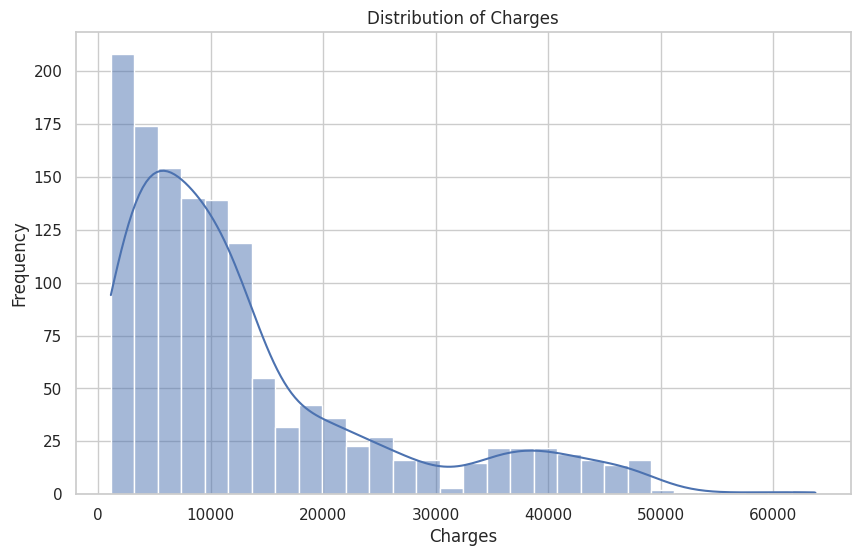

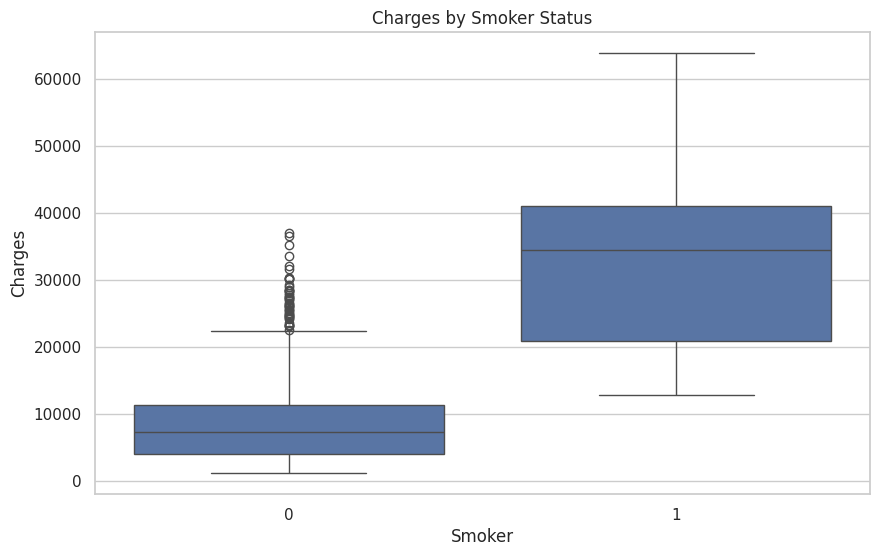

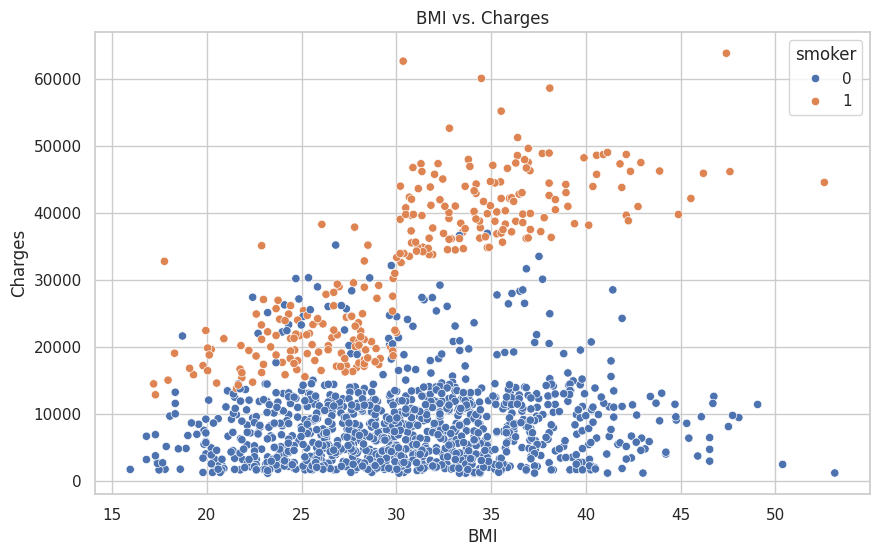

<Figure size 1000x600 with 0 Axes>

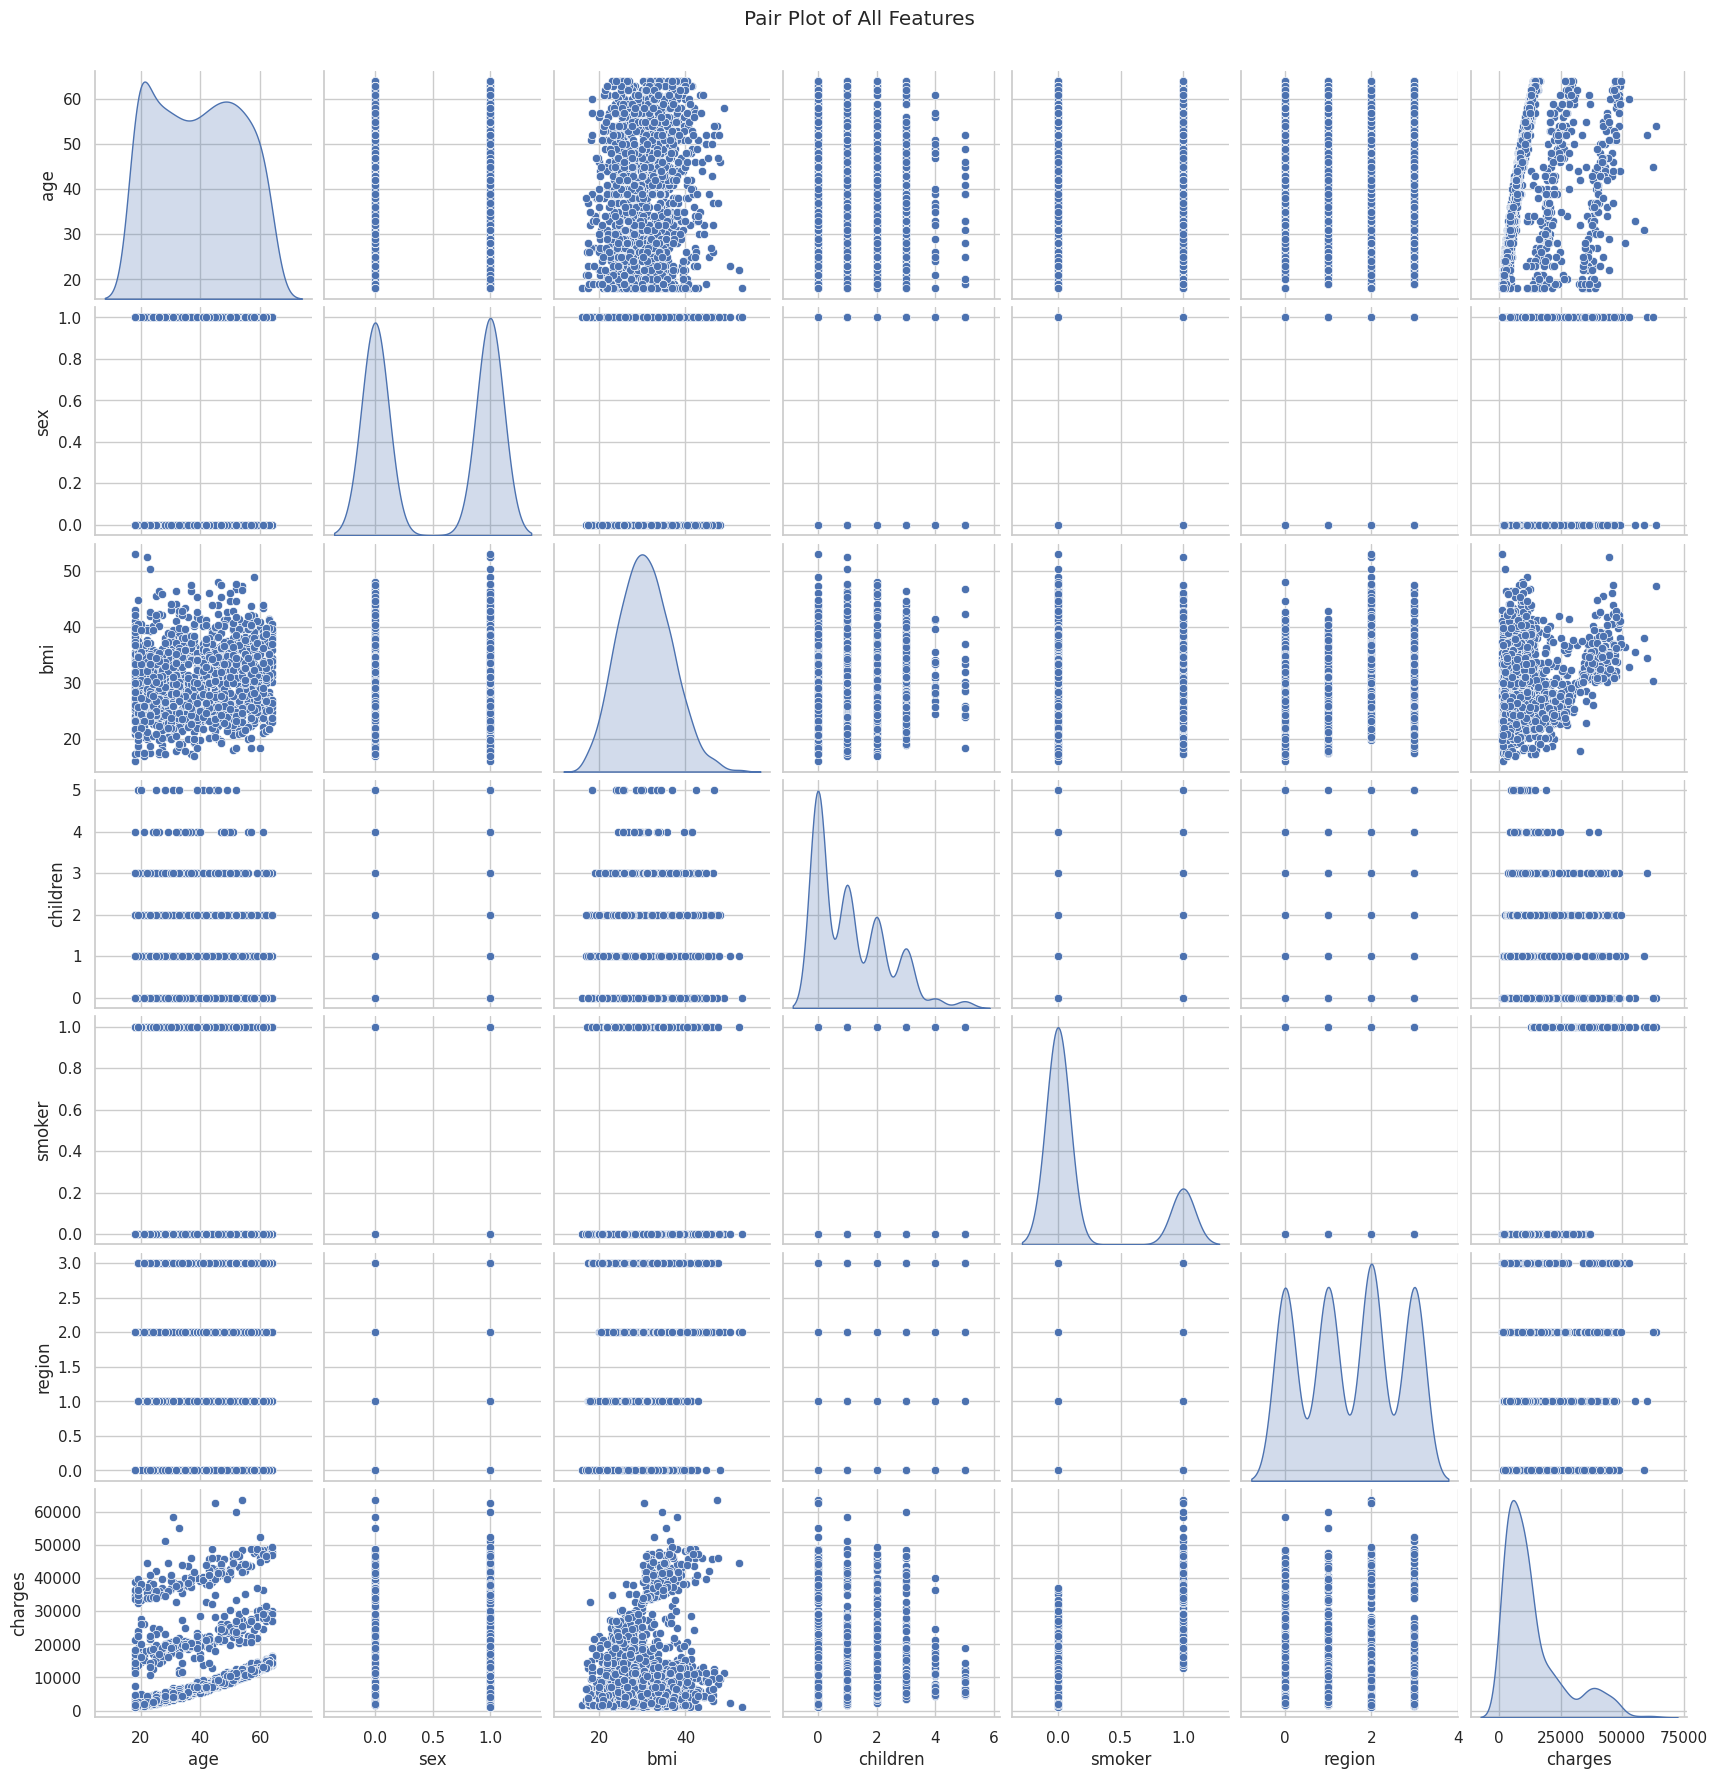

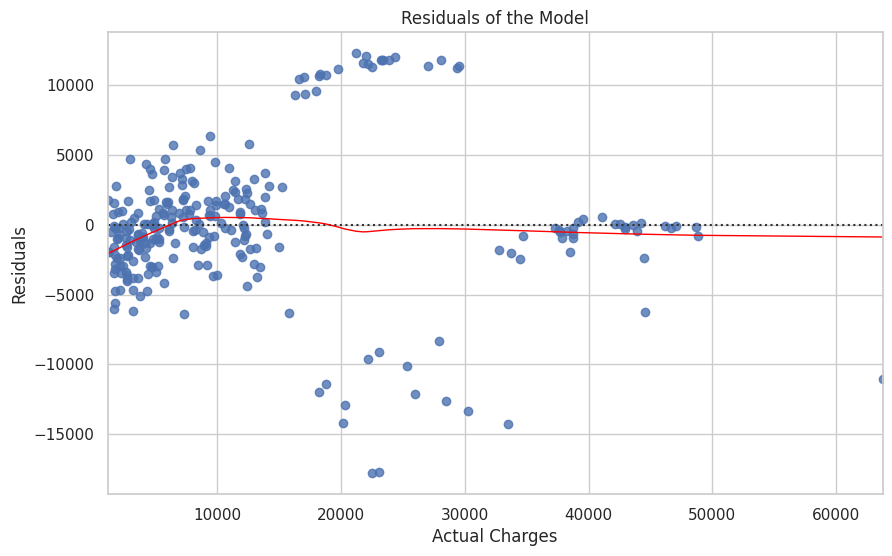

In [10]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Histogram of charges
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Box plot of charges by smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Scatter plot of BMI vs. charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Pair plot of all features
plt.figure(figsize=(10, 6))
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pair Plot of All Features', y=1.02)
plt.show()

# Residual plot to check the model fit
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals of the Model')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.show()
